# Домашнее задание по занятию 21

## Задание 1
* Загрузите набор данных make_circles из sklearn.datasets.
* Визуализируйте данные с помощью matplotlib.
* Кластеризация с DBSCAN.

DBSCAN:
* Примените DBSCAN к данным. Начните с параметров eps=0.5 и min_samples=5.
* Визуализируйте результаты кластеризации.
* Тюнинг параметров: 
    * Изменяйте значения eps и min_samples для DBSCAN. Попробуйте не менее трёх разных комбинаций для каждого параметра.
    * Для каждой комбинации визуализируйте результаты и сделайте выводы о влиянии этих параметров на результат кластеризации.

In [28]:
# Импорт необходимых библиотек и модулей
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN, KMeans, SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from tqdm import tqdm

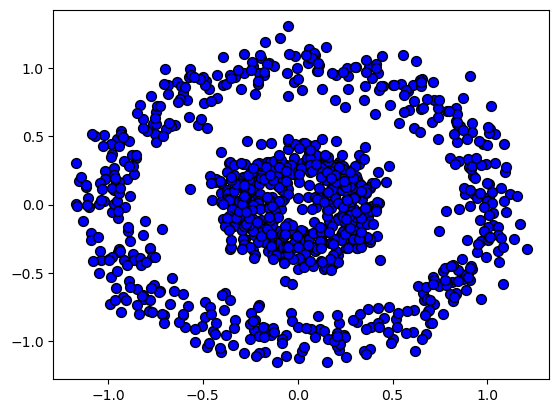

In [2]:
# 1. Изучение данных
# Загрузка набора данных
X, y = make_circles(n_samples=1000, factor=0.3, noise=0.1)
# Визуализация данных
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', edgecolor='black', s=50)
plt.show()

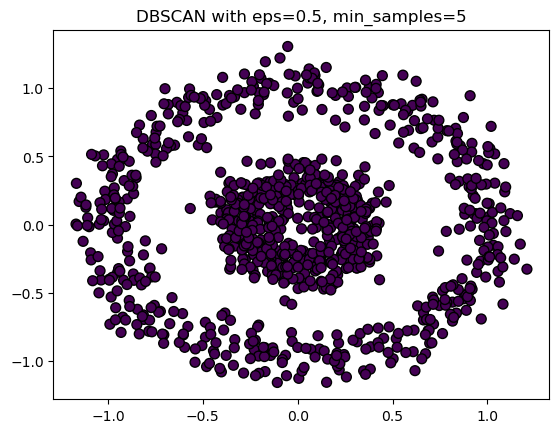

In [3]:
# 2. Кластеризация с DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="viridis", marker='o', edgecolor='black', s=50)
plt.title('DBSCAN with eps=0.5, min_samples=5')
plt.show()

In [26]:
silhouette_score_dict = {}
for i in range(5, 501):
    epsilon = i/1000
    dbscan = DBSCAN(eps=epsilon, min_samples=5)
    clusters = dbscan.fit_predict(X)
    try:
        score = round(silhouette_score(X, clusters), 2)
    except:
        continue
    silhouette_score_dict[epsilon] = score
df = pd.DataFrame(silhouette_score_dict.values(),index=silhouette_score_dict.keys())

px.line(df)


In [29]:
best_scores = []
silhouette_score_dict = {}
bs = -1

for min_sample in tqdm(range(5, 31)):
    for i in range(5, 501):
        epsilon = i/1000
        dbscan = DBSCAN(eps=epsilon, min_samples=5)
        clusters = dbscan.fit_predict(X)
        try:
            score = silhouette_score(X, clusters)
            silhouette_score_dict[min_sample] = [epsilon, score]
        except:
            continue
        if score > bs:
            bs = score
            best_scores = [min_sample, epsilon, score]
print(f'Best score for DBSCAN: min_sample={best_scores[0]}, eps={best_scores[1]} - {best_scores[2]}')

  0%|          | 0/26 [00:00<?, ?it/s]

100%|██████████| 26/26 [07:30<00:00, 17.33s/it]

Best score for DBSCAN: min_sample=5, eps=0.098 - 0.3473772085949123


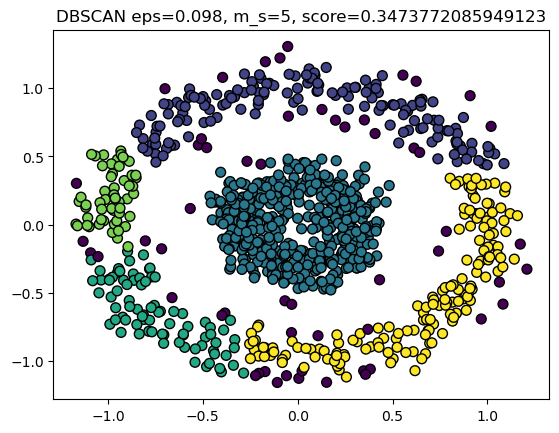

In [30]:
dbscan = DBSCAN(eps=best_scores[1], min_samples=best_scores[0])
clusters = dbscan.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="viridis", marker='o', edgecolor='black', s=50)
plt.title(f'DBSCAN eps={best_scores[1]}, m_s={best_scores[0]}, score={best_scores[2]}')
fig.tight_layout()
plt.show()

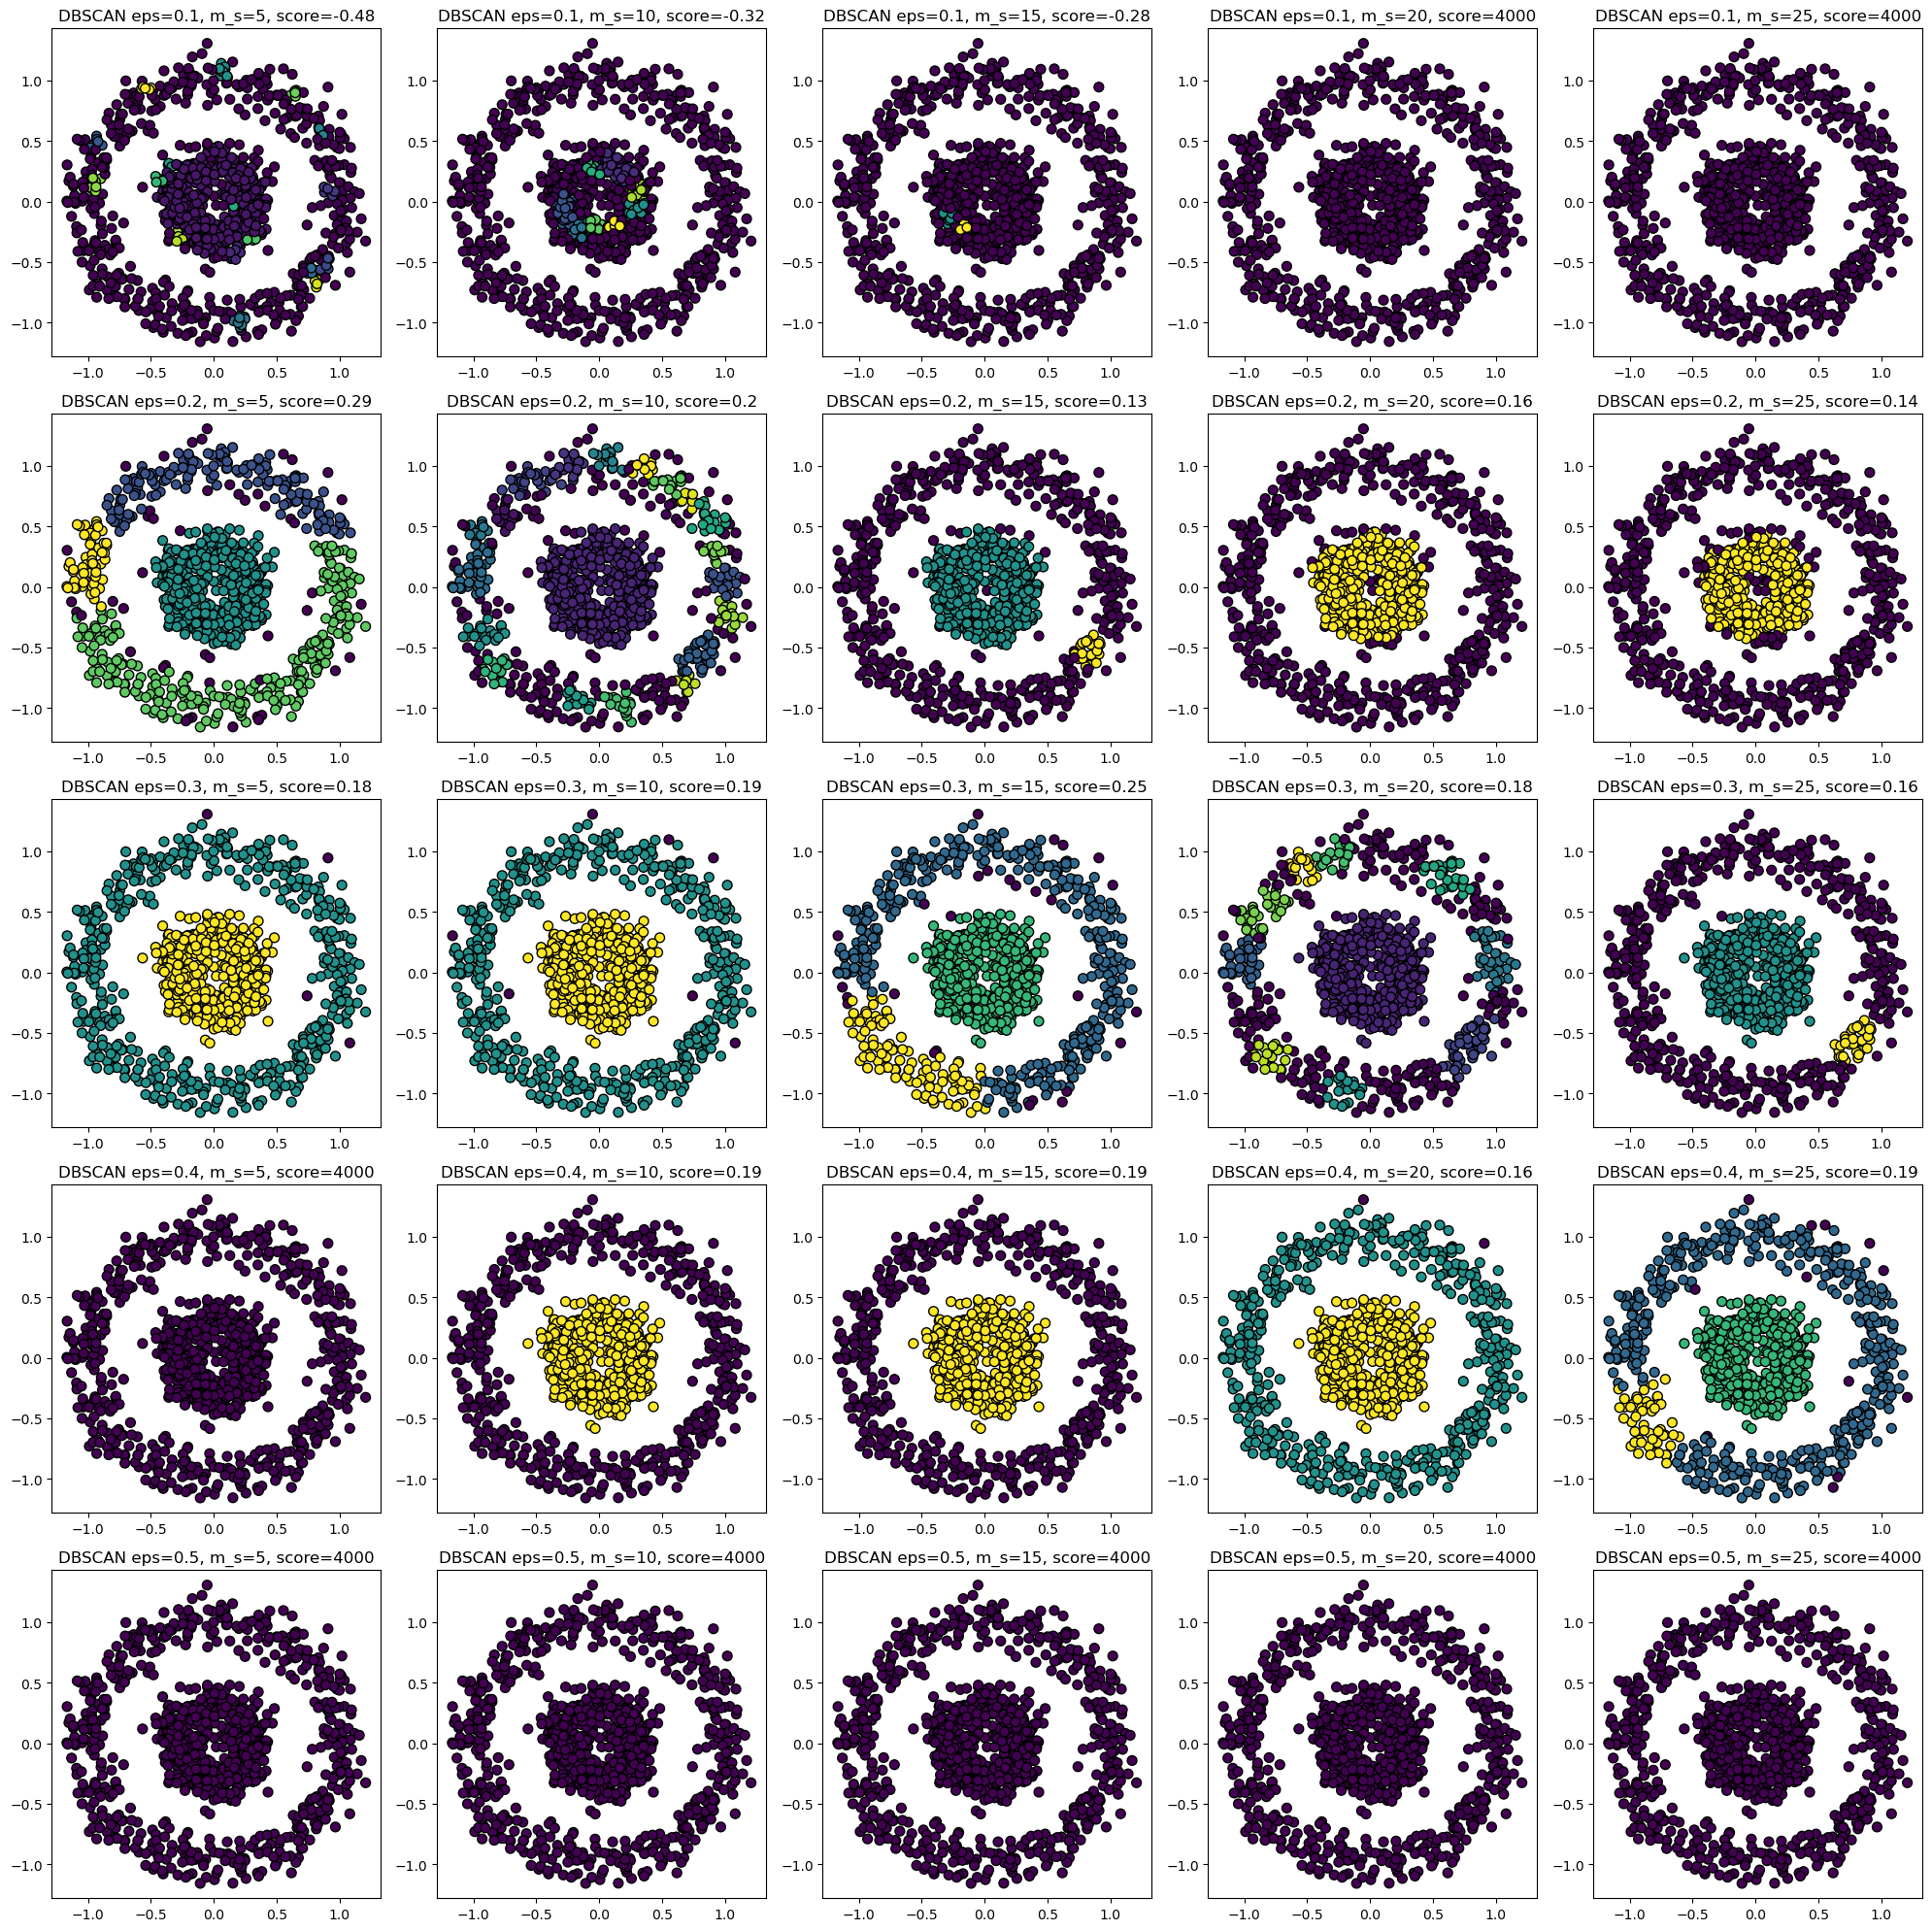

In [7]:
n_row = 5
n_col = 5

fig, axes = plt.subplots(n_row, n_col, figsize = (n_col*4, n_row*4))

for i, ax in enumerate(fig.axes):
    #print((i//5+1)/10, (i%5+1)*5)
    dbscan = DBSCAN(eps=(i//5+1)/20, min_samples=(i%5+1)*5)
    clusters = dbscan.fit_predict(X)
    try:
        score = round(silhouette_score(X, clusters), 2)
    except:
        score = 4000
    ax.scatter(X[:, 0], X[:, 1], c=clusters, cmap="viridis", marker='o', edgecolor='black', s=50)
    ax.set_title(f'DBSCAN eps={(i//5+1)/10}, m_s={(i%5+1)*5}, score={score}')
fig.tight_layout()
plt.show()

## Задание 2
Сравнение с KMeans:

* Примените алгоритм KMeans к тем же данным.
* Визуализируйте результаты и сравните с результатами DBSCAN.

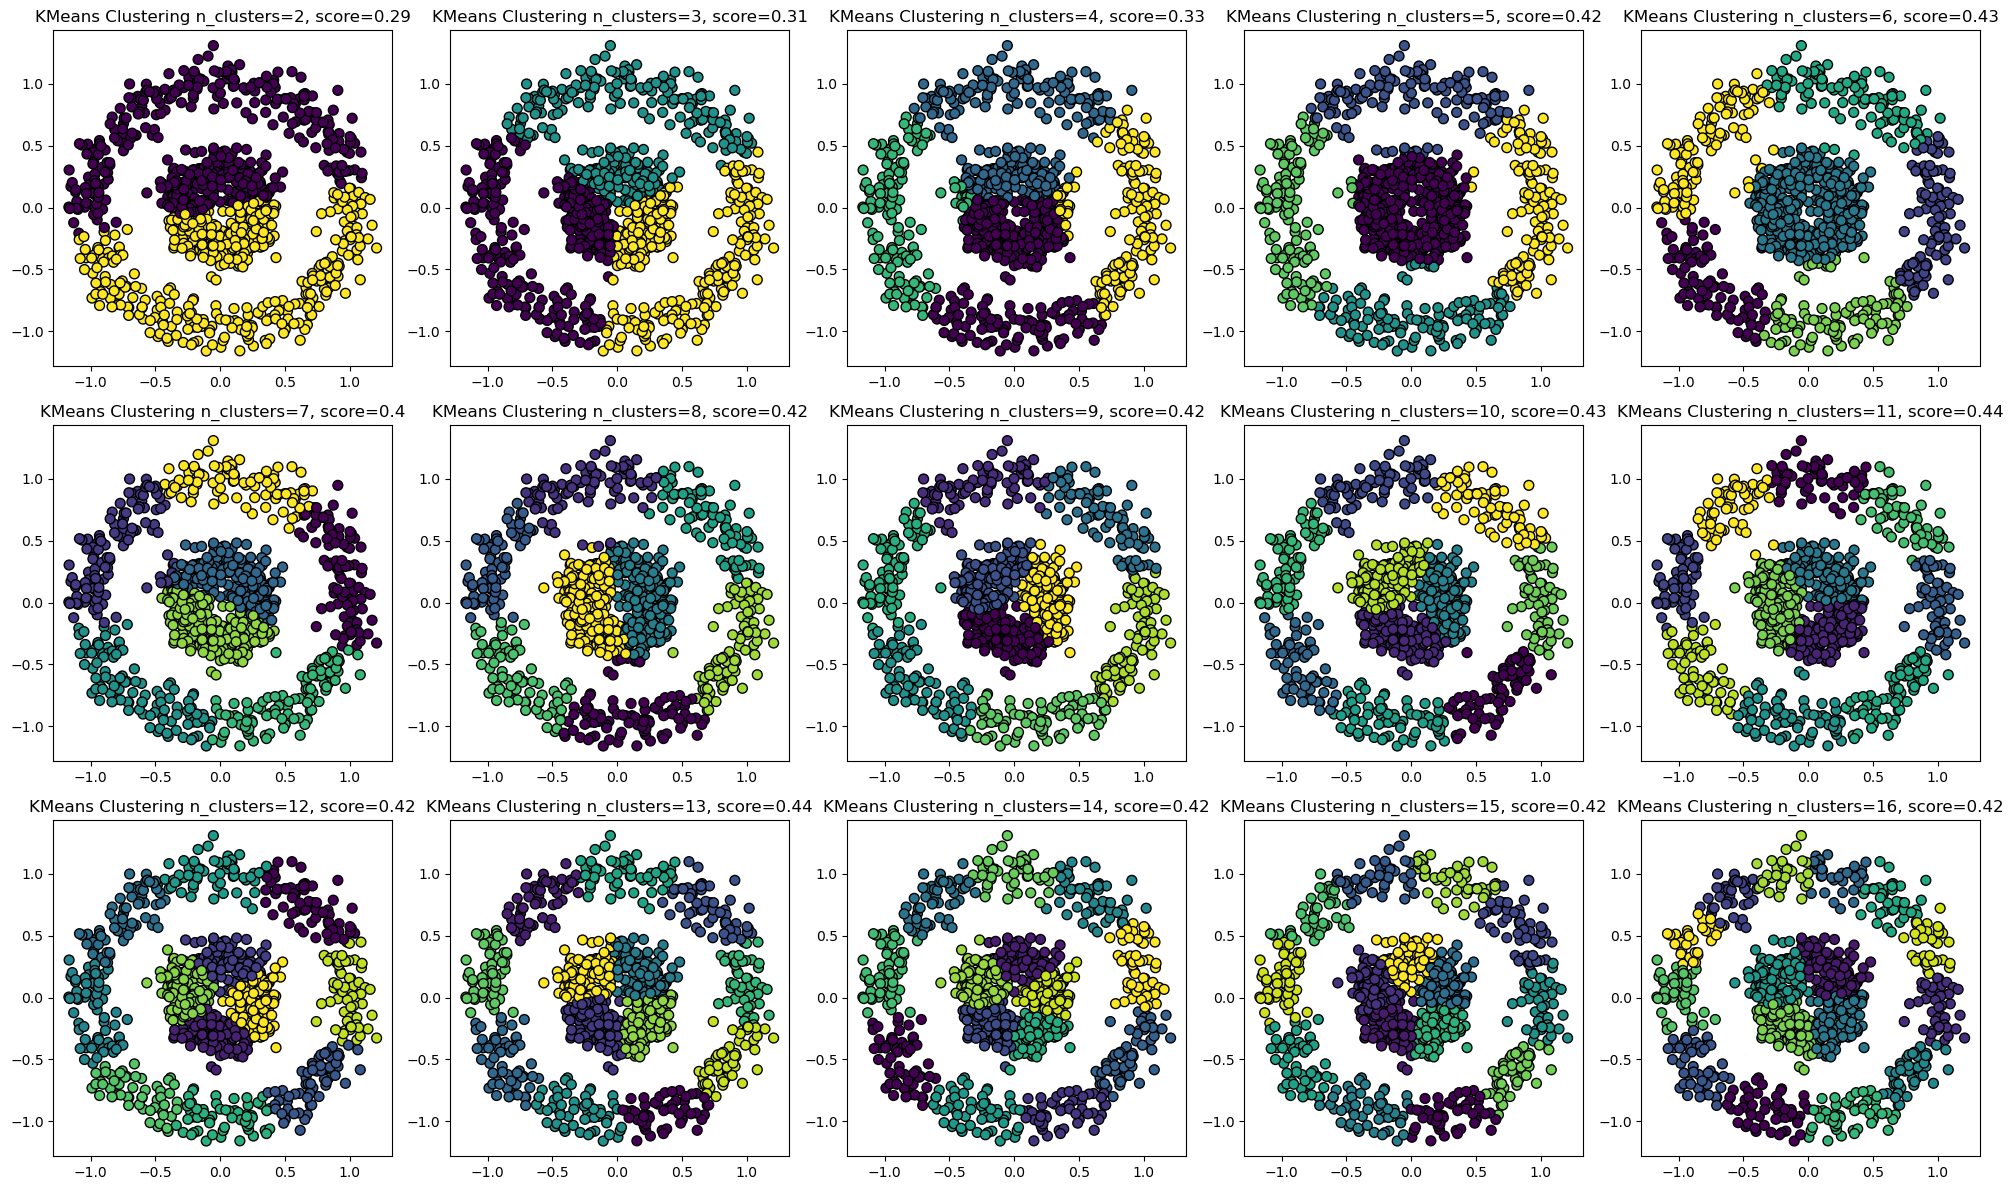

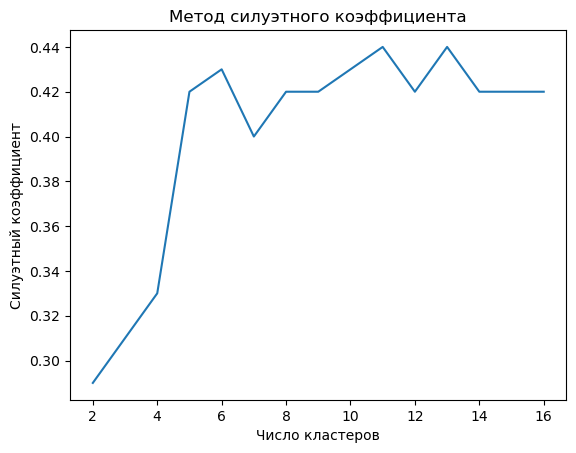

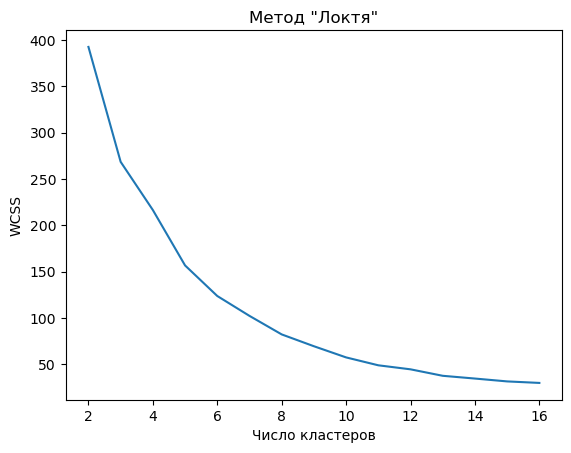

In [8]:
silhouette_coefficients = []
wcss = []
n_row = 3
n_col = 5

fig, axes = plt.subplots(n_row, n_col, figsize = (n_col*4, n_row*4))
for i, ax in enumerate(fig.axes):
    kmeans = KMeans(n_clusters=i+2, n_init='auto', max_iter=300)
    clusters = kmeans.fit_predict(X)
    ax.scatter(X[:, 0], X[:, 1], c=clusters, cmap="viridis", marker='o', edgecolor='black', s=50)
    try:
        score = round(silhouette_score(X, clusters), 2)
        silhouette_coefficients.append(score)
    except:
        score = 4000
    wcss.append(kmeans.inertia_)
    ax.set_title(f'KMeans Clustering n_clusters={i+2}, score={score}')

fig.tight_layout()
plt.show()

plt.plot(range(2, 17), silhouette_coefficients)
plt.title('Метод силуэтного коэффициента')
plt.xlabel('Число кластеров')
plt.ylabel('Силуэтный коэффициент')
plt.show()

plt.plot(range(2, 17), wcss)
plt.title('Метод "Локтя"')
plt.xlabel('Число кластеров')
plt.ylabel('WCSS')
plt.show()

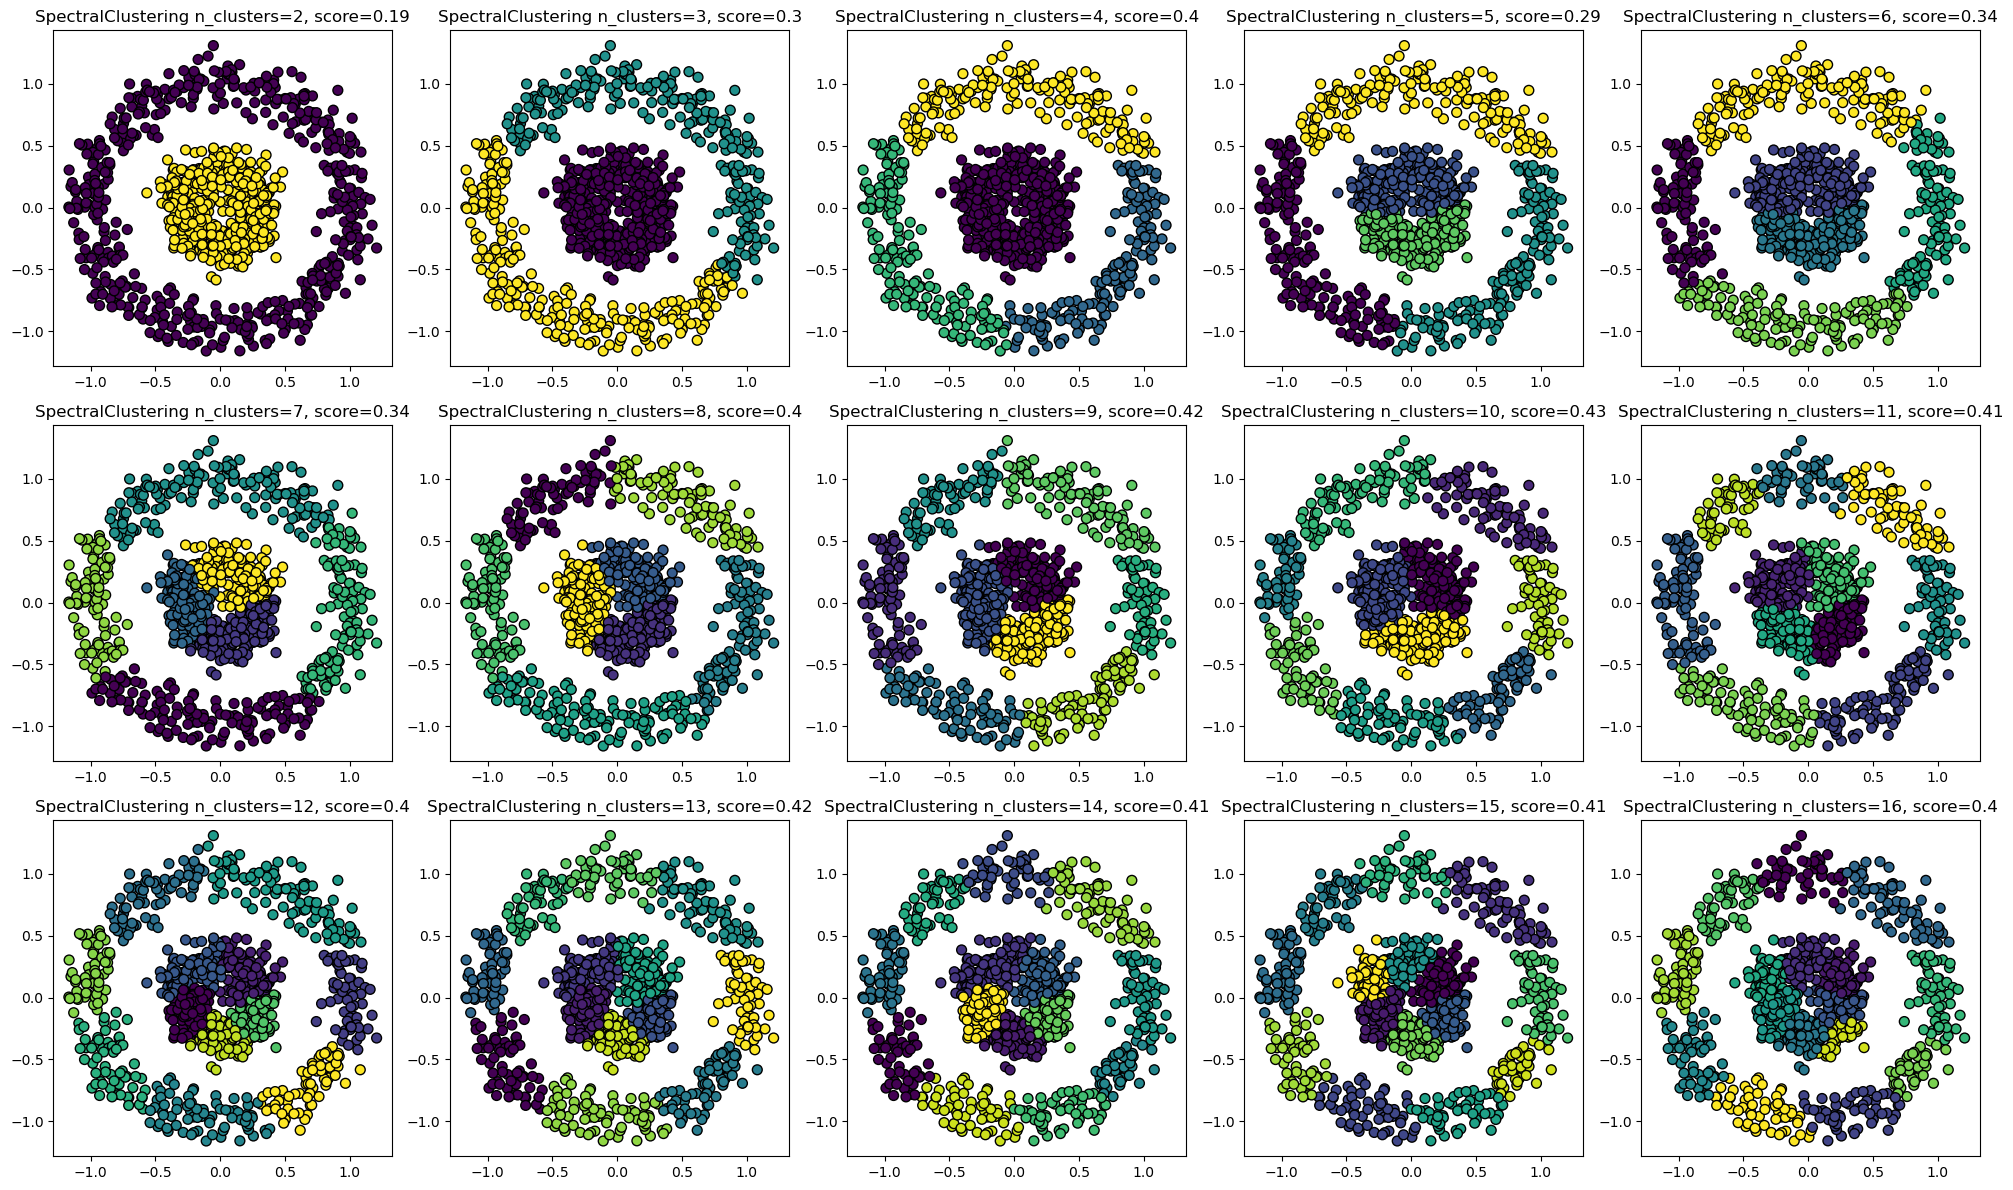

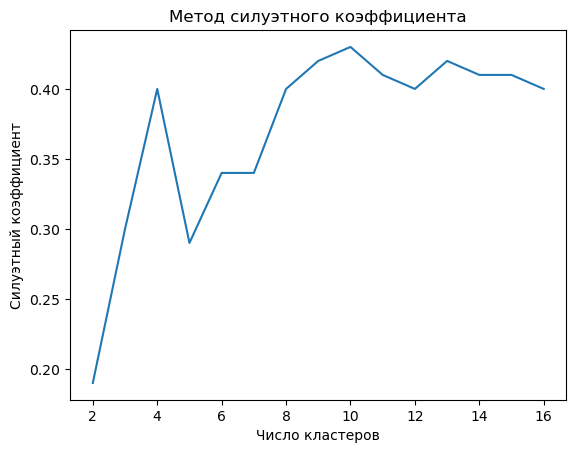

In [9]:
silhouette_coefficients = []
n_row = 3
n_col = 5

fig, axes = plt.subplots(n_row, n_col, figsize = (n_col*4, n_row*4))
for i, ax in enumerate(fig.axes):
    sc = SpectralClustering(n_clusters=i+2, affinity='nearest_neighbors')
    clusters = sc.fit_predict(X)
    ax.scatter(X[:, 0], X[:, 1], c=clusters, cmap="viridis", marker='o', edgecolor='black', s=50)
    try:
        score = round(silhouette_score(X, clusters), 2)
        silhouette_coefficients.append(score)
    except:
        score = 4000
    ax.set_title(f'SpectralClustering n_clusters={i+2}, score={score}')

fig.tight_layout()
plt.show()

plt.plot(range(2, 17), silhouette_coefficients)
plt.title('Метод силуэтного коэффициента')
plt.xlabel('Число кластеров')
plt.ylabel('Силуэтный коэффициент')
plt.show()